# Diffusion of 1 chemical in 2D

## An initial concentration pulse of a single chemical (near the left edge of the system, and halfway vertically), diffusing towards equilibrium

The system starts out with a "concentration pulse" in just one bin - i.e. that bin is initially the only one with a non-zero concentration of the only chemical species.
Then the system is left undisturbed, and followed to diffusive equilibrium.

(Note: this is the 2D counterpart of the 1D experiment by the same name)

### TAGS :  "diffusion 2D", "quick-start"

In [1]:
LAST_REVISED = "Jan. 22, 2025"
LIFE123_VERSION = "1.0.0rc2"        # Library version this experiment is based on

In [2]:
#import set_path                    # Using MyBinder?  Uncomment this before running the next cell!

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path   

from life123 import BioSim2D, ChemData, check_version

In [4]:
check_version(LIFE123_VERSION)

OK


In [5]:
# Prepare the initial system, with a single non-zero bin, near the left edge of the system, positioned halfway vertically
chem_data = ChemData(names="A", diffusion_rates=0.02)

bio = BioSim2D(x_bins=8, y_bins=5, chem_data=chem_data)

In [6]:
bio.describe_state()

SYSTEM STATE at Time t = 0:
Species `A`:
     0    1    2    3    4    5    6    7
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0


## Request history-keeping for some bins

In [7]:
bio.enable_history(bins=[(1,2), (7,4)], frequency=3)    # Request to save the concentration history at those bins 
                                                        # (the one with the initial injection, and one far away in a corner)

History enabled for bins [(1, 2), (7, 4)] and chemicals None (None means 'all')


## Apply the initial concentration pulse

In [8]:
bio.set_bin_conc(bin_address = (1,2), chem_label="A", conc=10.)

bio.describe_state()

SYSTEM STATE at Time t = 0:
Species `A`:
     0     1    2    3    4    5    6    7
4  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0


In [9]:
bio.system_snapshot(chem_label="A")

0     1    2    3    4    5    6    7
4  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

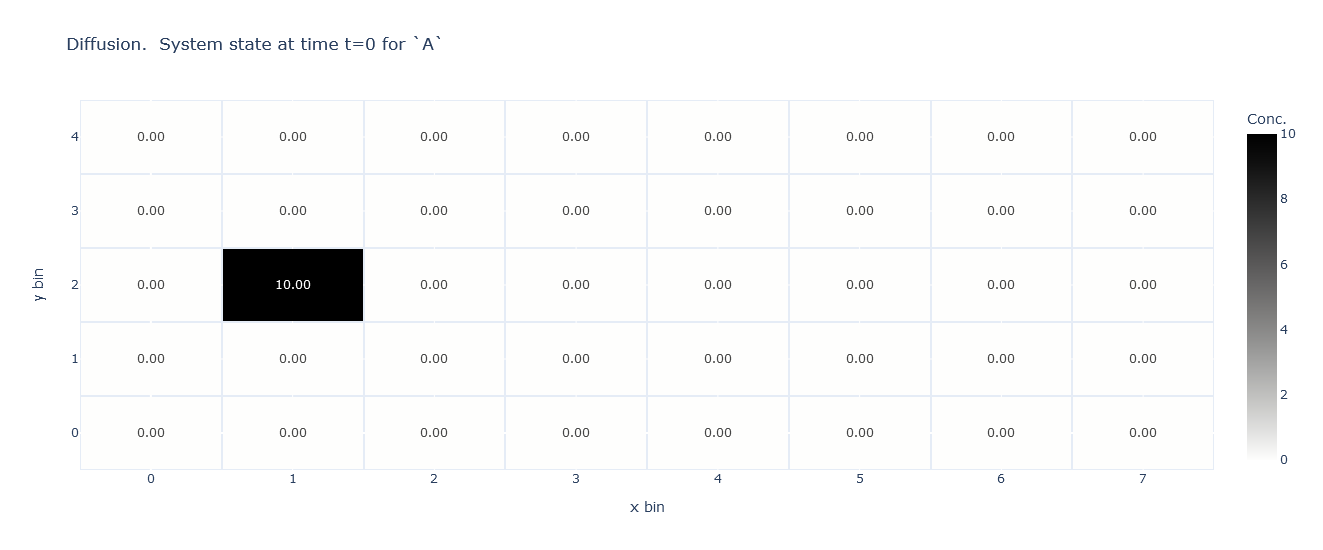

In [10]:
bio.heatmap_single_chem(chem_label="A", title_prefix="Diffusion")

# Initial Diffusion Step

In [11]:
delta_time = 10.

status = bio.diffuse(total_duration=delta_time, time_step=0.1)
print("\n", status)

bio.describe_state()


 {'steps': 100}
SYSTEM STATE at Time t = 10:
Species `A`:
          0         1         2         3         4         5             6             7
4  0.021467  0.101184  0.019573  0.001899  0.000122  0.000006  2.203662e-07  7.055683e-09
3  0.205745  0.959044  0.187423  0.018382  0.001194  0.000058  2.203531e-06  7.136569e-08
2  1.052394  4.856162  0.957855  0.094854  0.006221  0.000303  1.171495e-05  3.834040e-07
1  0.205745  0.959044  0.187423  0.018382  0.001194  0.000058  2.203531e-06  7.136569e-08
0  0.021467  0.101184  0.019573  0.001899  0.000122  0.000006  2.203662e-07  7.055683e-09


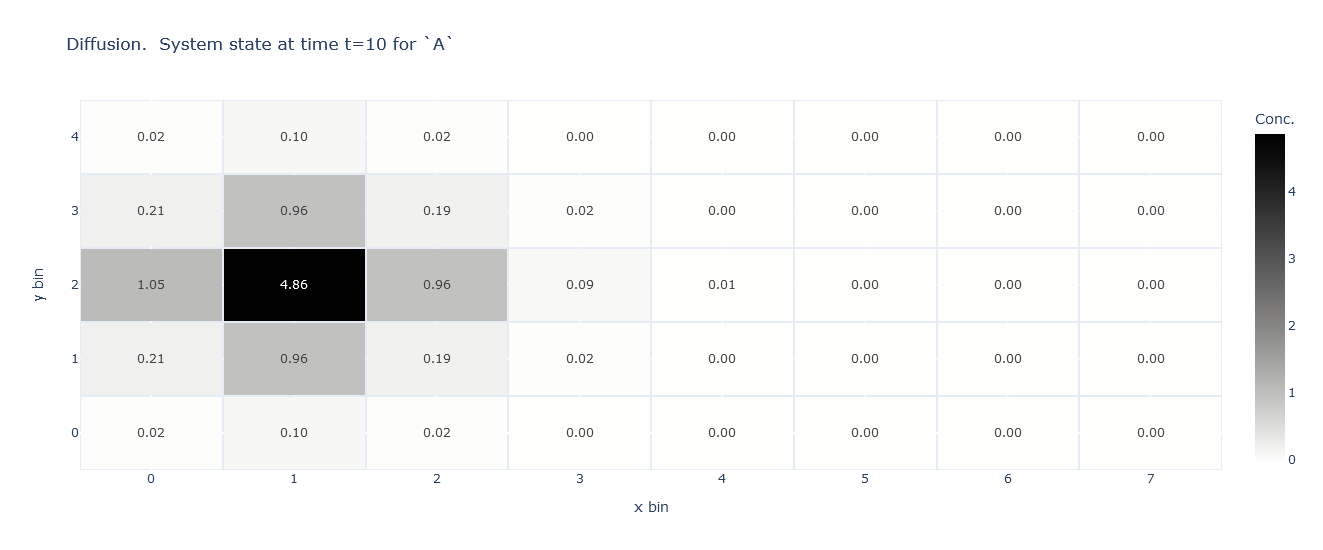

In [12]:
bio.heatmap_single_chem(chem_label="A", title_prefix="Diffusion")

In [13]:
# MASS-CONSERVATION CHECK. Verify that that sum of all the entries in the above matrix is still the initial 10.
bio.check_mass_conservation(chem_label="A", expected=10.)

True

## This is still an early stage in the diffusion process; let's advance it more... (Visualization from results shown at selected times)

SYSTEM STATE at Time t = 20:
Species `A`:
          0         1         2         3         4         5         6         7
4  0.099450  0.227366  0.083545  0.016125  0.002093  0.000204  0.000016  0.000001
3  0.454281  1.033156  0.381327  0.073972  0.009652  0.000945  0.000074  0.000005
2  1.220265  2.763366  1.023643  0.199392  0.026127  0.002569  0.000202  0.000014
1  0.454281  1.033156  0.381327  0.073972  0.009652  0.000945  0.000074  0.000005
0  0.099450  0.227366  0.083545  0.016125  0.002093  0.000204  0.000016  0.000001


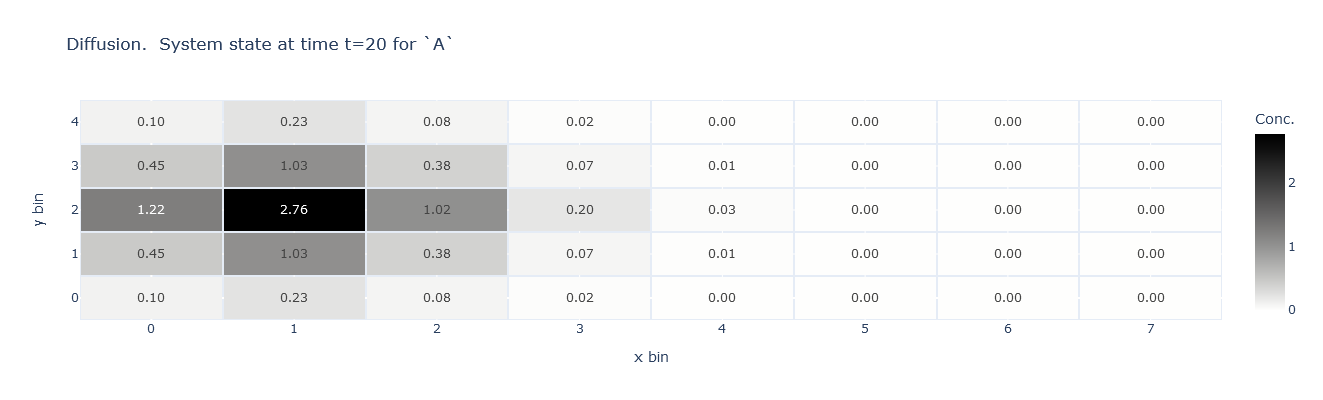

SYSTEM STATE at Time t = 30:
Species `A`:
          0         1         2         3         4         5         6         7
4  0.201446  0.315009  0.158323  0.044518  0.008576  0.001250  0.000146  0.000015
3  0.600798  0.936757  0.471904  0.133094  0.025724  0.003763  0.000442  0.000047
2  1.161444  1.807104  0.911874  0.257745  0.049932  0.007322  0.000862  0.000092
1  0.600798  0.936757  0.471904  0.133094  0.025724  0.003763  0.000442  0.000047
0  0.201446  0.315009  0.158323  0.044518  0.008576  0.001250  0.000146  0.000015


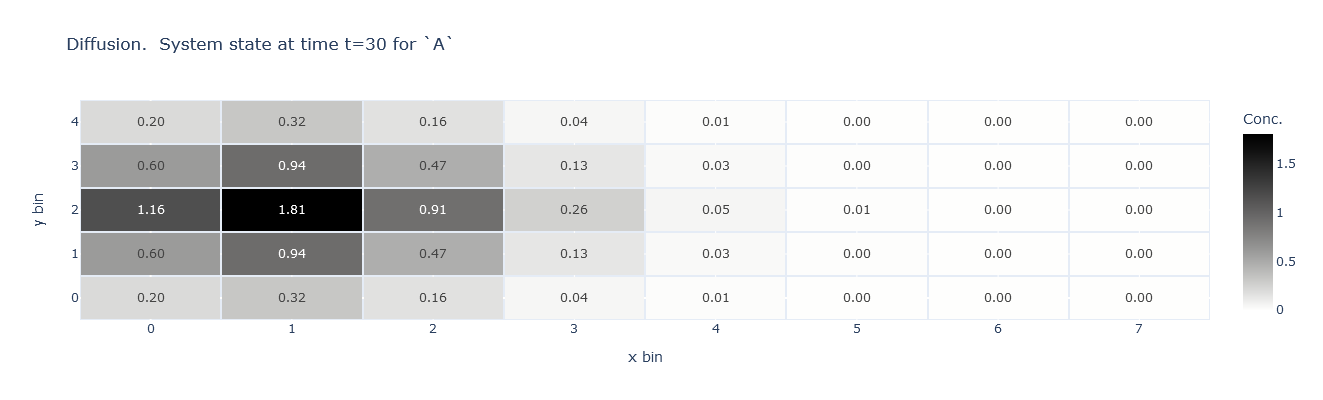

SYSTEM STATE at Time t = 80:
Species `A`:
          0         1         2         3         4         5         6         7
4  0.506124  0.470504  0.348500  0.196510  0.086253  0.030518  0.009056  0.002731
3  0.651796  0.605845  0.448797  0.253152  0.111169  0.039355  0.011686  0.003527
2  0.751013  0.698018  0.517108  0.291737  0.128146  0.045379  0.013480  0.004070
1  0.651796  0.605845  0.448797  0.253152  0.111169  0.039355  0.011686  0.003527
0  0.506124  0.470504  0.348500  0.196510  0.086253  0.030518  0.009056  0.002731


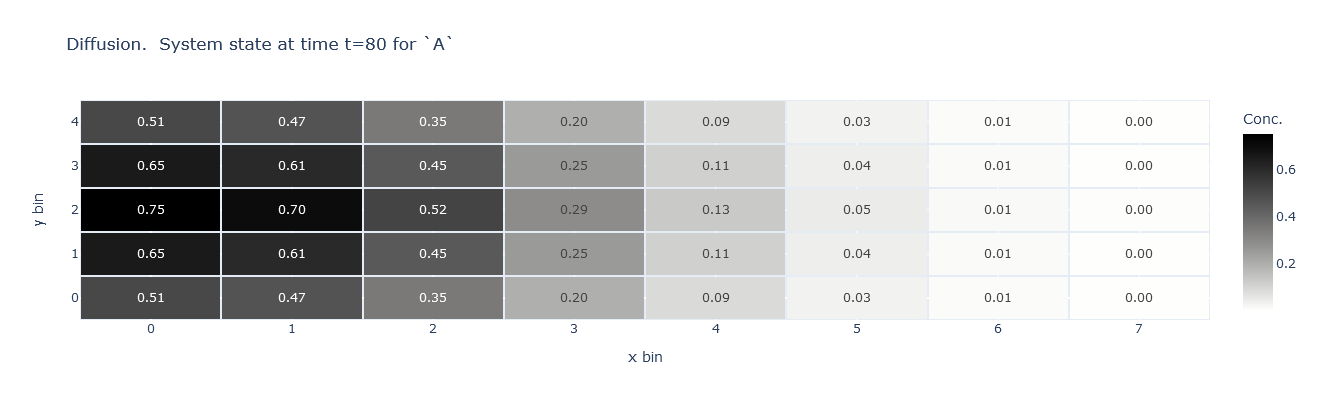

SYSTEM STATE at Time t = 1810:
Species `A`:
          0         1         2         3         4         5         6         7
4  0.251647  0.251396  0.250933  0.250328  0.249672  0.249067  0.248604  0.248353
3  0.251647  0.251396  0.250933  0.250328  0.249672  0.249067  0.248604  0.248353
2  0.251647  0.251396  0.250933  0.250328  0.249672  0.249067  0.248604  0.248353
1  0.251647  0.251396  0.250933  0.250328  0.249672  0.249067  0.248604  0.248353
0  0.251647  0.251396  0.250933  0.250328  0.249672  0.249067  0.248604  0.248353


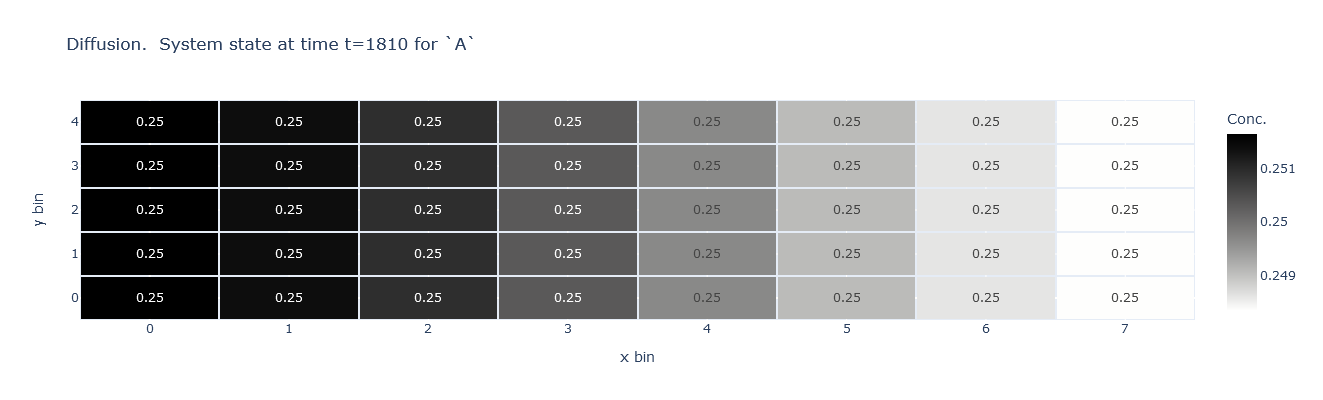

In [14]:
for i in range(180):
    status = bio.diffuse(total_duration=delta_time, time_step=0.1)

    if i<2 or i==6 or i>=179:
        bio.describe_state()
        fig = bio.heatmap_single_chem(chem_label="A", title_prefix="Diffusion", height=400)
        fig.show()

# All bins now have essentially uniform concentration. The diffusion has reached equilibrium

Notice, throughout the simulation, the continued symmetry across the mid-row (ybin 2).

**Mass conservations**: the initial "10. units of concentration" are now uniformly spread across the 40 (5x8) bins, leading to a near-constant concentration of 10./40

In [15]:
10./40

0.25

In [16]:
# Mass conservation can also be verified as follows:
bio.check_mass_conservation(chem_label="A", expected=10.)

True

## Visualization of time changes at particular bins

#### Instead of visualizing the entire system at a moment of time, like in the previous heatmaps, let's now look at the time evolution of the (only) chemical `A` at either of the bins whose history we requested prior to running the simulation

In [17]:
bio.conc_history.bin_history(bin_address=(1,2))   # The bin where the initial concentration was applied

SYSTEM TIME         A
0             0.3  9.762391
1             0.6  9.531824
2             0.9  9.308067
3             1.2  9.090898
4             1.5  8.880100
...           ...       ...
5968       1808.7  0.251401
5969       1809.0  0.251400
5970       1809.3  0.251399
5971       1809.6  0.251398
5972       1809.9  0.251396

[5973 rows x 2 columns]

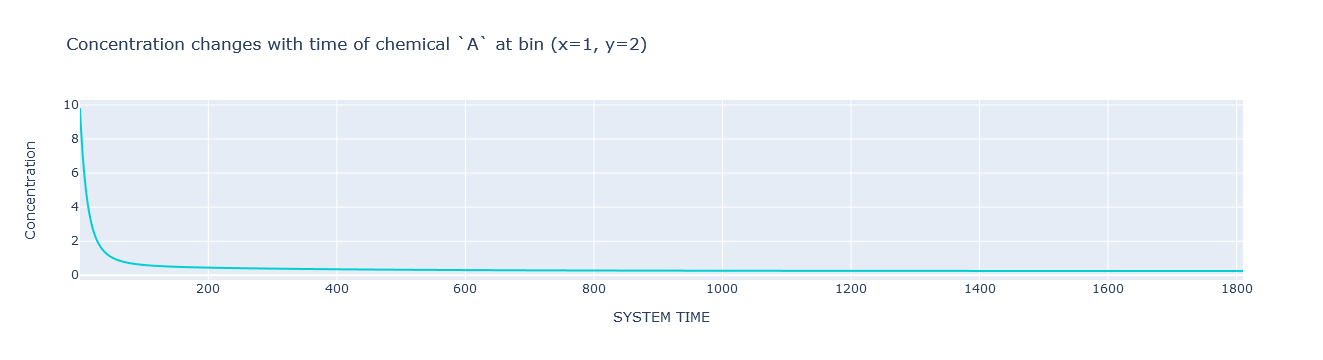

In [18]:
bio.plot_history_single_bin(bin_address=(1,2))

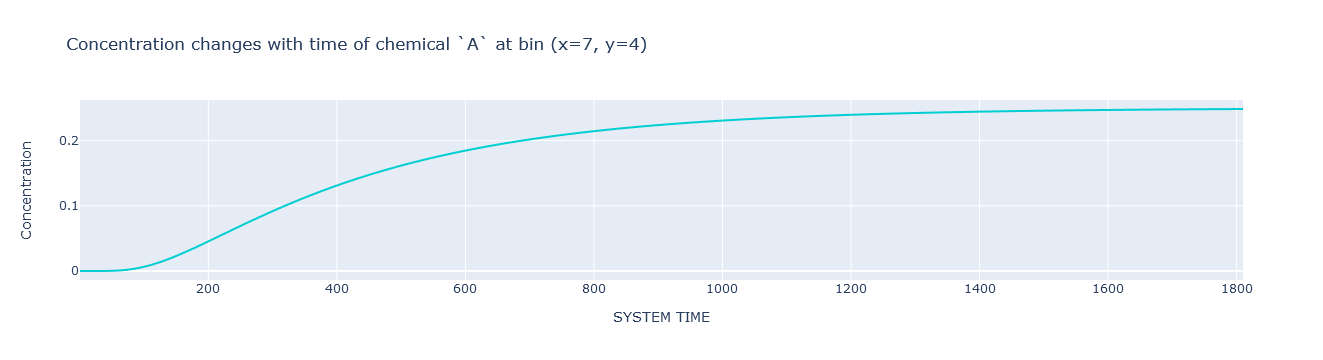

In [19]:
bio.plot_history_single_bin(bin_address=(7,4))   # A bin in a far-away corner from the initial concentration injection